# Imports

In [64]:
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import optuna
from sklearn.linear_model import Ridge, Lasso , LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import joblib
%matplotlib inline

In [65]:
data=pd.read_csv('ecommerce_customers.csv')

# Getting some general informations about our dataset

In [66]:
data.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [67]:
data.shape

(500, 8)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [69]:
data.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [70]:
data.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

No null values in the dataset

## Checking for correlation between features

C:\Users\slili\AppData\Local\Temp\ipykernel_24756\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

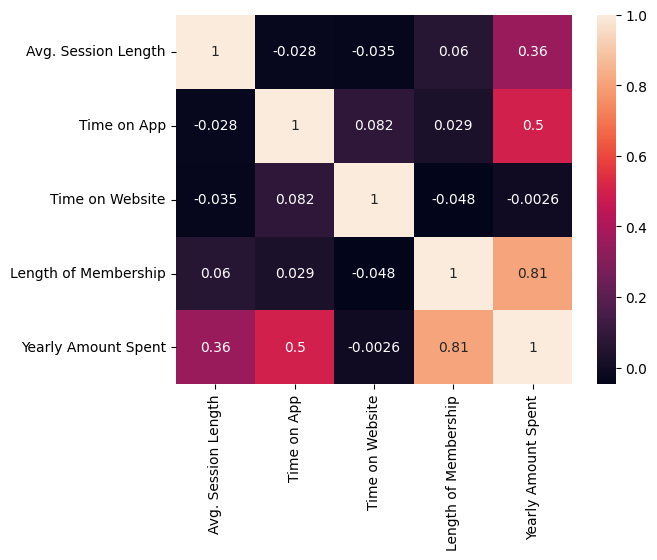

In [71]:
sns.heatmap(data.corr(),annot=True)

Yearly amount spent and the length of leadership are the most correlated features <br> let's check that further with another plot

<AxesSubplot: xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

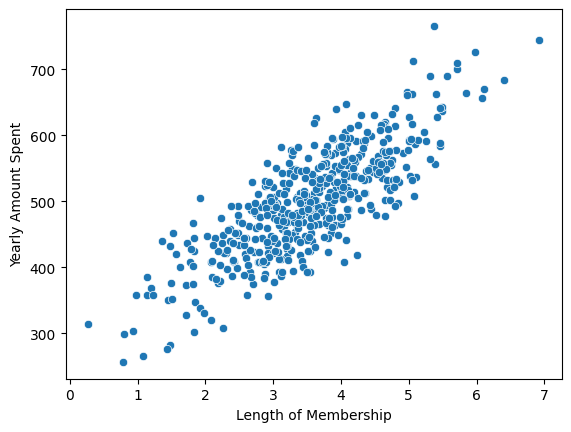

In [72]:
sns.scatterplot(data=data,x='Length of Membership',y='Yearly Amount Spent')

In [73]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

Let's drop the avatar column because it is useless

In [74]:
data=data.drop(['Avatar'],axis=1)

Let's extract the email provider from the email address so we could probably decide on which of theese providers we could created ads to earn more 

In [75]:
data['Email']=data['Email'].apply(lambda x : x.split("@")[1].split(".")[0].strip())

In [76]:
data['Email']

0            fernandez
1              hotmail
2                yahoo
3                gmail
4      davidson-herman
            ...       
495        craig-evans
496              gmail
497            hotmail
498            hotmail
499           davidson
Name: Email, Length: 500, dtype: object

In [77]:
data.Email.nunique()

236

We have 236 unique email provider

In [78]:
data.head()


Email                                            Address  \
0        fernandez       835 Frank Tunnel\nWrightmouth, MI 82180-9605   
1          hotmail     4547 Archer Common\nDiazchester, CA 06566-8576   
2            yahoo  24645 Valerie Unions Suite 582\nCobbborough, D...   
3            gmail   1414 David Throughway\nPort Jason, OH 22070-1220   
4  davidson-herman  14023 Rodriguez Passage\nPort Jacobville, PR 3...   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

Let's get the city name from the address column

In [79]:
data['Address']=data['Address'].apply(lambda x : x.split("\n")[1].split(",")[0].strip())

In [80]:
data['Address'].nunique()

492

As we move forward in our analysis we can say that the address column and the email column wont be that usefull so we can simply drop them

In [81]:
data.drop(['Email','Address'],inplace=True,axis=1)

In [82]:
data.head()

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

# Exploratory data analysis

Let's first investigate our target variable

In [83]:
sns.boxplot(data['Yearly Amount Spent'])

<AxesSubplot: >

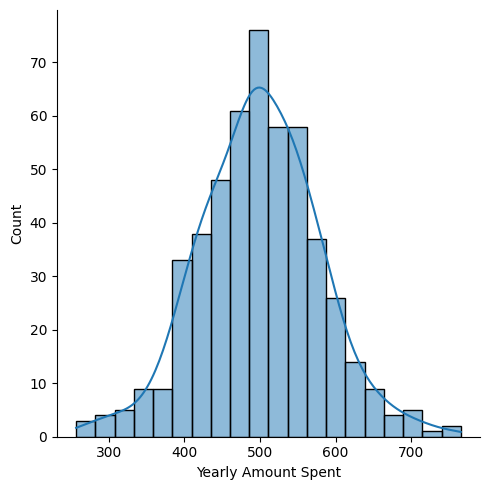

In [84]:
sns.displot(data['Yearly Amount Spent'],kde=True)

Our target variable has a normal ditribution

let's check it againt the other features

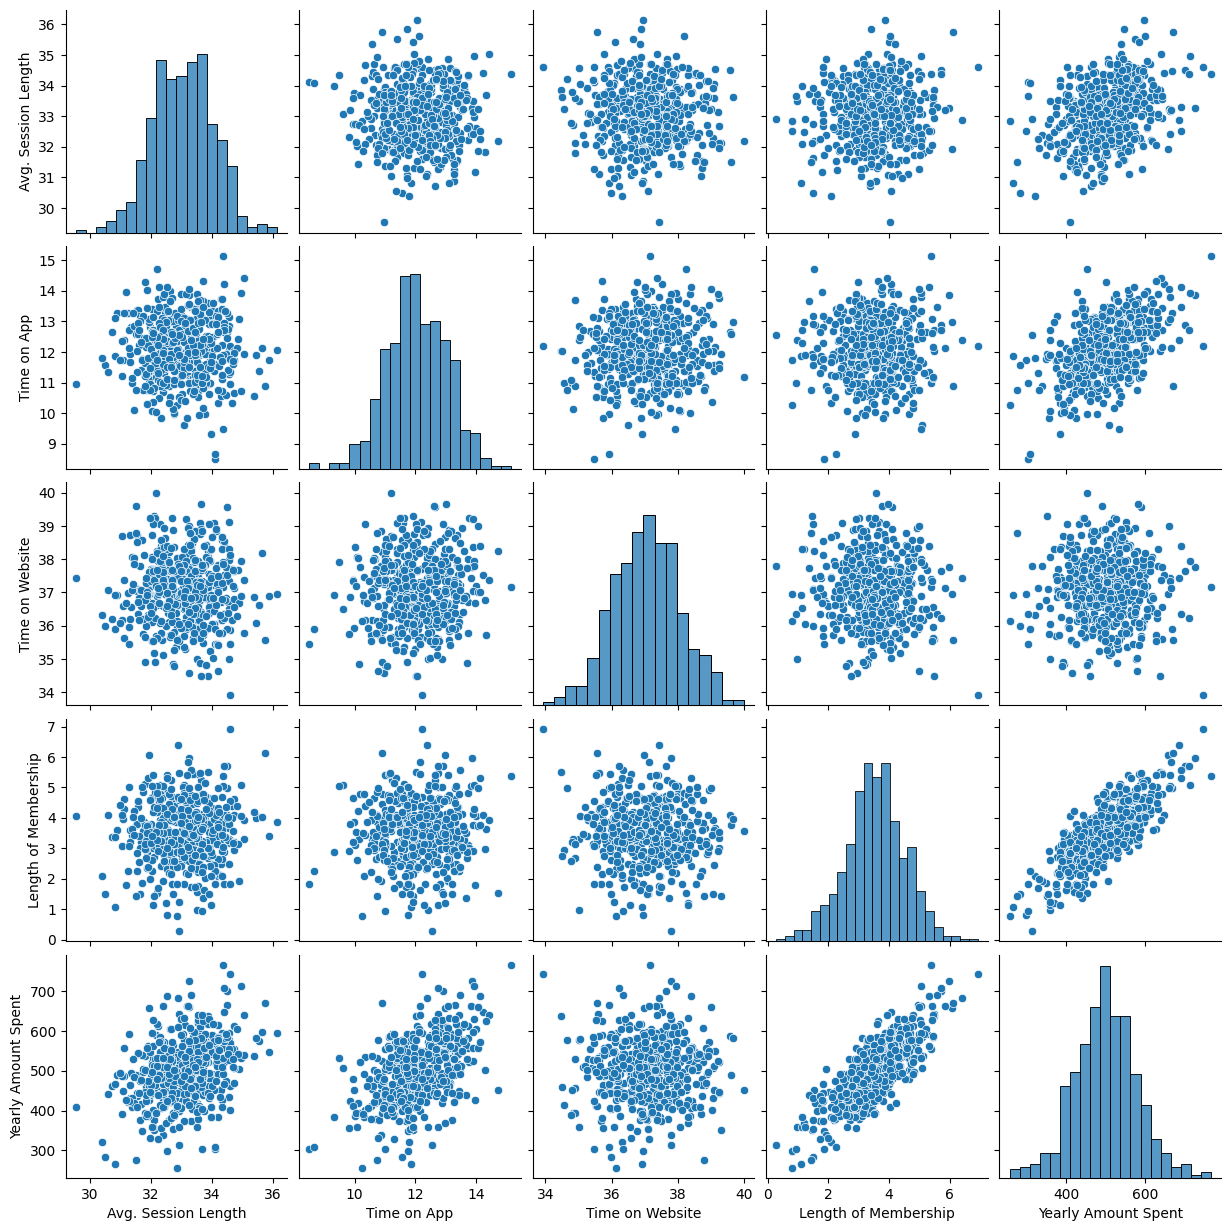

In [85]:
sns.pairplot(data=data)

In [86]:
data['Yearly Amount Spent'].corr(data['Length of Membership'])

0.8090835682475811

Almost all of our features have a normal distribution and our target variable is only correlated with the length of membership column with a correlation value of 0.8

# Feature Scaling

In [87]:
st=StandardScaler()
X=st.fit_transform(data.drop('Yearly Amount Spent',axis=1))

In [88]:
y=data['Yearly Amount Spent']

# Splitting

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# ML Model 

## LinearRegression

In [90]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.987023638098357

## Ridge

In [91]:
rd=Ridge()

### Hyperparameter Tuning

In [92]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = {}
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(rd, grid, scoring='r2', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
print(f'R2: {results.best_score_}')
print(f'Alpha: {results.best_params_}')


R2: 0.9818027065075197
Alpha: {'alpha': 0.0}


The best alpha is 0.44 and it provides a r2 score of 0.983

## Lasso

In [93]:
ls=Lasso(max_iter=10e5,tol=1e-4)